In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
sym.init_printing(use_unicode=True)
from time import sleep
from tqdm import tqdm

In [16]:
def Laguerre(L,m):
    polinomio=((2*m-1-x)*L[m-1]-(m-1)*L[m-2])/m
    return polinomio
def GetLaguerre(n,x):
    #y = (x**2 - 1)**n
    x = sym.Symbol('x',real=True)
    #y = sym.Symbol('y',real=True)
    #L=np.zeros(n)
    L=[]
    L.append(1)
    L.append(1-x)
    #L[0]=1
    #L[1]=1-x    
    for m in range(2,n):
        L.append(Laguerre(L,m))
        #sym.diff( y,x,n )/(2**n*np.math.factorial(n))
    
    return L[-1]

x = sym.Symbol('x',real=True)
def f(x):
    return x**3/(np.exp(x)-1)
n=6
#print(GetLaguerre(n,x))
DLaguerre=[]
L=[]
L.append(1)
L.append(1-x)
for i in range(2,n):
    L.append(Laguerre(L,i))
for i in range(n):
    DLaguerre.append(sym.diff(L[i],x,1))

#print(DLaguerre)

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRoots(n):
    xn= np.linspace(0,(n+(n-1)*(n)**0.5)+1,100)
    x = sym.Symbol('x',real=True)
    DLaguerre=[]
    L=[]
    L.append(1)
    L.append(1-x)
    for i in range(2,n):
        L.append(Laguerre(L,i))
    #print(L)
    for i in range(n):
        DLaguerre.append(sym.diff(L[i],x,1))
    
    poly = sym.lambdify([x],L[n-1],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n-1],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

def GetWeightsGLag(n):
    Roots_=GetAllRoots(n)
    x = sym.Symbol('x',real=True)
    allck=[]
    #print(len(Roots_))
    L=[]
    L.append(1)
    L.append(1-x)
    for i in range(2,n+1):
        L.append(Laguerre(L,i))
    Ln_1=sym.lambdify([x],L[n],'numpy')
    for xk in Roots_:
        #print(xk)
        ck=xk/(((n+1)**2)*(Ln_1(xk))**2)
        
        allck.append(ck)
    return allck

Roots = GetAllRoots(n)
pesos=GetWeightsGLag(n)
sumatoria_total=0
for i in range(len(pesos)):
    sumatoria_total+=pesos[i]*f(Roots[i])

print(sumatoria_total)
#print('valor real',(np.pi**4)/15)

0.3631688911692125


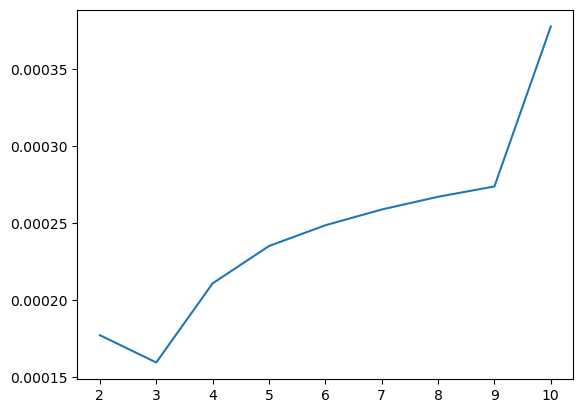

In [17]:
plot_n=[]
plot_error=[]
for n in range(2,11):
    Roots = GetAllRoots(n)
    pesos=GetWeightsGLag(n)
    sumatoria_total=0
    for i in range(len(pesos)):
        sumatoria_total+=pesos[i]*f(Roots[i])
    plot_n.append(n)
    plot_error.append((sumatoria_total/(np.pi**4)/15))
    
plt.plot(plot_n,plot_error)